In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ✅ Load data from CSV (not notebook!)
df = pd.read_csv("C:/Users/Gangadhar/Downloads/credit_risk_dataset.csv")

df.dropna(inplace=True)

# Binary encoding
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'Y': 1, 'N': 0})

# One-hot encoding
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent'])

# Define X and y
target = 'loan_status'
X = df.drop(columns=[target])
y = df[target].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for LSTM
X_lstm = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y, test_size=0.2, random_state=42, stratify=y)


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build LSTM model
model = Sequential([
    LSTM(64, input_shape=(1, X_train.shape[2]), return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1, verbose=1)


C:\Users\Gangadhar\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7560 - loss: 0.5320 - val_accuracy: 0.8599 - val_loss: 0.3349
Epoch 2/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8705 - loss: 0.3249 - val_accuracy: 0.8869 - val_loss: 0.2988
Epoch 3/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8789 - loss: 0.3091 - val_accuracy: 0.8904 - val_loss: 0.2882
Epoch 4/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8854 - loss: 0.3035 - val_accuracy: 0.8931 - val_loss: 0.2801
Epoch 5/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8924 - loss: 0.2916 - val_accuracy: 0.8952 - val_loss: 0.2784
Epoch 6/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8879 - loss: 0.2935 - val_accuracy: 0.8983 - val_loss: 0.2702
Epoch 7/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8907 - loss: 0.2880 - val_accuracy: 0.8979 - val_loss: 0.2688
Epoch 8/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8909 - loss: 0.2858 - val_accuracy: 0.

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Metrics
lstm_accuracy = accuracy_score(y_test, y_pred)
lstm_precision = precision_score(y_test, y_pred)
lstm_recall = recall_score(y_test, y_pred)
lstm_f1 = f1_score(y_test, y_pred)
lstm_auc = roc_auc_score(y_test, y_pred_probs)

# Print
print(f"LSTM Accuracy: {lstm_accuracy:.4f}")
print(f"LSTM Precision: {lstm_precision:.4f}")
print(f"LSTM Recall: {lstm_recall:.4f}")
print(f"LSTM F1-Score: {lstm_f1:.4f}")
print(f"LSTM AUC: {lstm_auc:.4f}")


179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
LSTM Accuracy: 0.8979
LSTM Precision: 0.8727
LSTM Recall: 0.6189
LSTM F1-Score: 0.7242
LSTM AUC: 0.9078


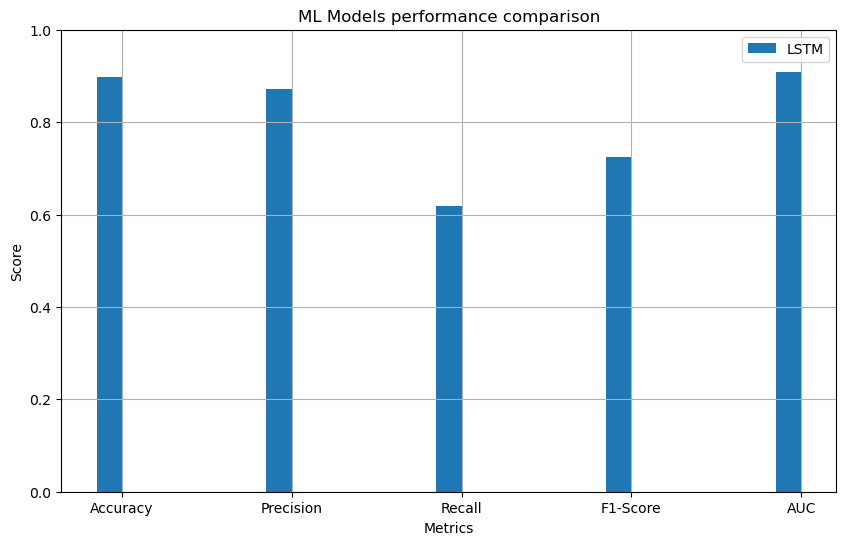

In [21]:
import matplotlib.pyplot as plt

# Example: update this dictionary with other model results if available
model_metrics = {
    'LSTM': {
        'Accuracy': lstm_accuracy,
        'Precision': lstm_precision,
        'Recall': lstm_recall,
        'F1-Score': lstm_f1,
        'AUC': lstm_auc
    },
    # Add other models like 'Logistic Regression', 'Random Forest', etc.
}

# Plot
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
x = np.arange(len(metrics_names))
width = 0.15

plt.figure(figsize=(10, 6))

for i, (model, scores) in enumerate(model_metrics.items()):
    plt.bar(x + i * width, [scores[m] for m in metrics_names], width=width, label=model)

plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("ML Models performance comparison")
plt.xticks(x + width / 2, metrics_names)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()
